<a href="https://colab.research.google.com/github/walidfoysol/flower-predict/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import matplotlib.pylab as plt

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [19]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
classifier.trainable=False

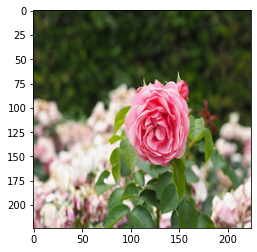

In [17]:
image = Image.open("gdrive/MyDrive/Artificial Intelligence/flower_photos/roses/18584002386_cec0df537d_n.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [20]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("/content/gdrive/MyDrive/Artificial Intelligence/flower_photos/LICENSE.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'dandelion/5033866477_a77cccba49_m.jpg CC-BY by torbakhopper - https://www.flickr.com/photos/gazeronly/5033866477/'

In [21]:
flower_folder=r"/content/gdrive/MyDrive/Artificial Intelligence/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [22]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])

In [23]:
data

[[array([[[ 0,  1,  2],
          [ 0,  2,  0],
          [ 1,  4,  2],
          ...,
          [ 6, 32,  9],
          [ 6, 28, 10],
          [ 7, 27,  8]],
  
         [[ 6,  5,  0],
          [10,  8,  1],
          [15, 11,  3],
          ...,
          [ 5, 31,  8],
          [ 5, 27,  9],
          [ 5, 26,  7]],
  
         [[23, 13,  2],
          [33, 22,  9],
          [44, 30, 17],
          ...,
          [ 6, 28,  9],
          [ 4, 26,  8],
          [ 4, 25,  6]],
  
         ...,
  
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 2,  0,  0],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 2,  0,  0],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]],
  
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 2,  0,  0],
          ...,
          [ 0,  0,  0],
          [ 0,  0,  0],
          [ 0,  0,  0]]], dtype=u

In [24]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.25490196, 0.24705882, 0.15294118],
         [0.2627451 , 0.25882353, 0.16470588],
         [0.25882353, 0.2627451 , 0.17254902],
         ...,
         [0.69803922, 0.67058824, 0.61176471],
         [0.64705882, 0.62352941, 0.57647059],
         [0.59215686, 0.56470588, 0.52941176]],

        [[0.25882353, 0.25490196, 0.16078431],
         [0.2745098 , 0.2745098 , 0.18039216],
         [0.2745098 , 0.27843137, 0.18823529],
         ...,
         [0.69803922, 0.67843137, 0.61960784],
         [0.64313725, 0.62745098, 0.58039216],
         [0.56862745, 0.54901961, 0.51372549]],

        [[0.2745098 , 0.2745098 , 0.18039216],
         [0.29411765, 0.30196078, 0.20392157],
         [0.29019608, 0.30588235, 0.20784314],
         ...,
         [0.70588235, 0.68235294, 0.62352941],
         [0.64705882, 0.62745098, 0.58039216],
         [0.55294118, 0.52156863, 0.48627451]],

        ...,

        [[0.03137255, 0.47058824, 0.95294118],
         [0.05490196, 0.49803922, 0.97647059]

In [25]:
x.shape

(3670, 224, 224, 3)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [27]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [28]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 76s 847ms/step - loss: 0.8067 - acc: 0.6973
Epoch 2/5
86/86 [==============================] - 73s 847ms/step - loss: 0.4155 - acc: 0.8492
Epoch 3/5
86/86 [==============================] - 72s 841ms/step - loss: 0.3251 - acc: 0.8881
Epoch 4/5
86/86 [==============================] - 73s 848ms/step - loss: 0.2767 - acc: 0.9092
Epoch 5/5
86/86 [==============================] - 73s 846ms/step - loss: 0.2325 - acc: 0.9320


In [30]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 27s 897ms/step - loss: 0.4044 - acc: 0.8475


[0.40441372990608215, 0.8474945425987244]